In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv('letter_csv.csv')
data.head(4)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H


In [14]:
data.rename(columns={'class':'letter'}, inplace=True)

In [27]:
data.head(2)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P


## Priprema podataka
(podela uzorka, slaganje u kolone)

In [30]:
x = np.array(data)[:, 0:16]
x

array([[2, 4, 4, ..., 8, 5, 6],
       [4, 7, 5, ..., 9, 7, 10],
       [7, 10, 8, ..., 5, 5, 10],
       ...,
       [4, 8, 4, ..., 9, 3, 7],
       [4, 11, 4, ..., 8, 0, 8],
       [5, 9, 6, ..., 8, 6, 8]], dtype=object)

In [31]:
y = np.array(data['letter'])[:]
y

array(['Z', 'P', 'S', ..., 'O', 'L', 'Q'], dtype=object)

In [38]:
x_train = x[0:16000,0:17]
x_test = x[16001:,:]
y_train = y[0:16000]
y_test = y[16001:]

In [33]:
from sklearn import svm

In [34]:
model = svm.SVC(C=3) #SVC je Suport vector classifier, postoji i SVR za regressor

In [35]:
#C je penalty

In [39]:
model.fit(x_test, y_test)

SVC(C=3)

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_pred

array(['T', 'P', 'D', ..., 'O', 'L', 'Q'], dtype=object)

## METRIKA

In [43]:
model.score(x_test, y_test)

0.940735183795949

In [44]:
y_grid = np.column_stack([y_test, y_pred])

In [50]:
y_grid

array([['T', 'T'],
       ['P', 'P'],
       ['D', 'D'],
       ...,
       ['O', 'O'],
       ['L', 'L'],
       ['Q', 'Q']], dtype=object)

In [51]:
#ovaj deo ispod je samo za imena na osi kada budemo pravili confusion matrix :)

In [46]:
import string

In [47]:
lab = list(string.ascii_uppercase[0:26])

In [48]:
plab = ["predicted " + s for s in lab]

In [49]:
plab

['predicted A',
 'predicted B',
 'predicted C',
 'predicted D',
 'predicted E',
 'predicted F',
 'predicted G',
 'predicted H',
 'predicted I',
 'predicted J',
 'predicted K',
 'predicted L',
 'predicted M',
 'predicted N',
 'predicted O',
 'predicted P',
 'predicted Q',
 'predicted R',
 'predicted S',
 'predicted T',
 'predicted U',
 'predicted V',
 'predicted W',
 'predicted X',
 'predicted Y',
 'predicted Z']

In [52]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=lab)

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

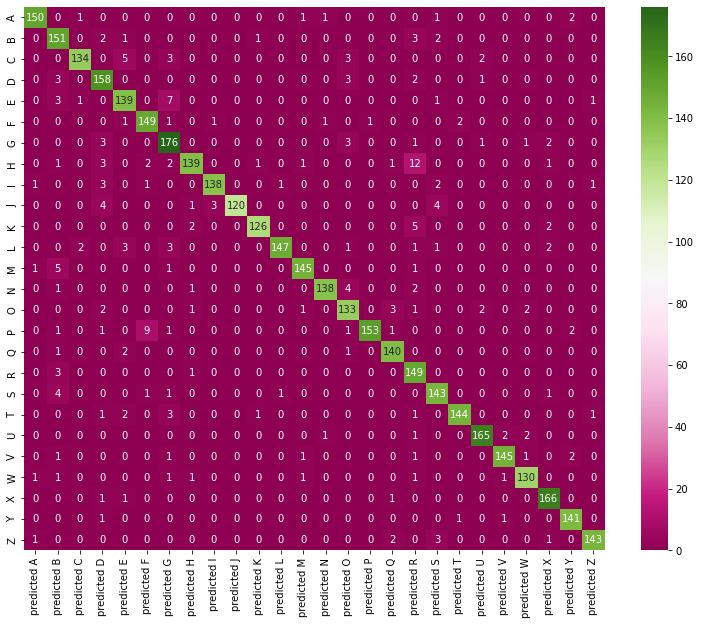

In [69]:
import seaborn as sns
cm_df = pd.DataFrame(cm, index=[i for i in lab], columns=[i for i in plab])
plt.figure(figsize=(13,10))
sns.heatmap(cm_df, annot=True, fmt='g',cmap='PiYG')
plt.show